In [9]:
using SerialPorts
using PyPlot
using FFTW

#=================================================================
Creating a matched filter
=================================================================#

list_serialports() # show available ports


33-element Array{String,1}:
 "/dev/ttyACM3"
 "/dev/ttyS0"  
 "/dev/ttyS1"  
 "/dev/ttyS10" 
 "/dev/ttyS11" 
 "/dev/ttyS12" 
 "/dev/ttyS13" 
 "/dev/ttyS14" 
 "/dev/ttyS15" 
 "/dev/ttyS16" 
 "/dev/ttyS17" 
 "/dev/ttyS18" 
 "/dev/ttyS19" 
 ⋮             
 "/dev/ttyS27" 
 "/dev/ttyS28" 
 "/dev/ttyS29" 
 "/dev/ttyS3"  
 "/dev/ttyS30" 
 "/dev/ttyS31" 
 "/dev/ttyS4"  
 "/dev/ttyS5"  
 "/dev/ttyS6"  
 "/dev/ttyS7"  
 "/dev/ttyS8"  
 "/dev/ttyS9"  

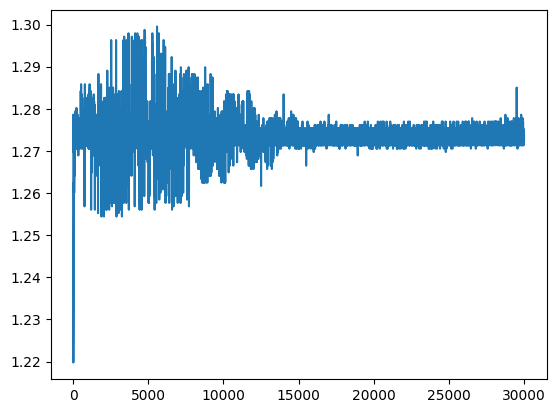

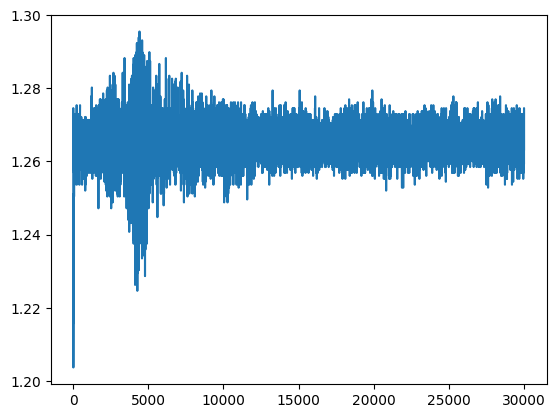

30001
30001


29999-element Array{Float64,1}:
 0.001021674871444702 
 0.001021674871444702 
 0.0010197275876998898
 0.001013885736465454 
 0.00101323664188385  
 0.0010184293985366821
 0.0010255694389343262
 0.001020376682281494 
 0.001021674871444702 
 0.001026867628097534 
 0.001020376682281494 
 0.001020376682281494 
 0.00101648211479187  
 ⋮                    
 0.001017131209373474 
 0.001017131209373474 
 0.001019078493118286 
 0.001021674871444702 
 0.0010184293985366821
 0.001021025776863098 
 0.001017780303955078 
 0.0010145348310470579
 0.001017131209373474 
 0.001026867628097534 
 0.001024271249771118 
 0.001017780303955078 

In [14]:

array_one = []
array_two = []

b = ""


ser = SerialPort("/dev/ttyACM3", 9600)

readavailable(ser)

#transmit and receive
write(ser, "c")

while bytesavailable(ser) < 1
    continue
end

sleep(0.05)
readavailable(ser) #removes the conversion complete line

#=================================================================#

# Get the first buffer

write(ser, "a") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end

array_one=split(b, ("\r\n"))

#=================================================================#

b = "" #clear b
readavailable(ser)

#second buffer
write(ser, "b") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end

close(ser)

array_two=split(b, ("\r\n"))


println(length(array_one))
println(length(array_two))

#=================================================================#
ac1 = []
i=1

while (i<length(array_one)-1)
    push!(ac1,parse(Int,(array_one[i])))
    i+=1
end

match_one = (3.3/4096).*ac1

figure()
plot(match_one)

#=================================================================#
ac2 = []
i=1

while (i<length(array_two)-1)
    push!(ac2,parse(Int,(array_two[i])))
    i+=1
end

match_two = (3.3/4096).*ac2

figure()
plot(match_two)

FilterOne = (3.3/4096).*match_one
FilterTwo= (3.3/4096).*match_two